MAE: 141.3063414214839
MSE: 107039.07808960916
RMSE: 327.16827182599656
R2 Score: 0.9996103476618028


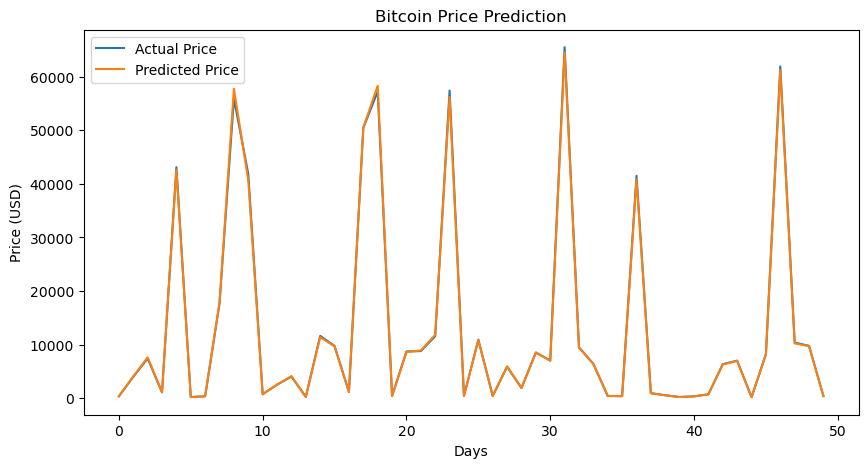

Predicted Bitcoin Price: 42357.99093984886


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])

df = df[['Open', 'High', 'Low', 'Volume', 'Close']]

df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual Price")
plt.plot(y_pred[:50], label="Predicted Price")
plt.legend()
plt.title("Bitcoin Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.show()

future_input = pd.DataFrame(
    [[42000, 43000, 41500, 35000000000]],
    columns=['Open', 'High', 'Low', 'Volume']
)

future_price = model.predict(future_input)
print("Predicted Bitcoin Price:", future_price[0])